# Linked List Class

In [1]:
from random import randint
class Node:
    def __init__(self, value=None):
        self.value = value
        self.next = None
        self.prev = None
    
    def __str__(self):
        return str(self.value)

class LinkedList:
    def __init__(self, values = None):
        self.head = None
        self.tail = None
    
    def __str__(self):
        values = [str(x.value) for x in self]
        return ' -> '.join(values)

    def __iter__(self):
        curNode = self.head
        while curNode:
            yield curNode
            curNode = curNode.next
    
    def __len__(self):
        result = 0
        node = self.head
        while node:
            result += 1
            node = node.next
        return result
    
    def add(self, value):
        if self.head is None:
            newNode = Node(value)
            self.head = newNode
            self.tail = newNode
        else:
            self.tail.next = Node(value)
            self.tail = self.tail.next
        return self.tail
    
    def generate(self, n, min_value, max_value):
        self.head = None
        self.tail = None
        for i in range(n):
            self.add(randint(min_value,max_value))
        return self

customLL = LinkedList()
customLL.generate(10, 0, 99)
print(customLL)
print(len(customLL))

20 -> 99 -> 48 -> 63 -> 36 -> 77 -> 16 -> 15 -> 31 -> 48
10


# Remove Duplicates

Write a function to remove duplicates from an unsorted linked list. 
* **Input**: `1 -> 2 -> 2 -> 3 -> 4 -> 4 -> 4 -> 5`
* **Output**: `1 -> 2 -> 3 -> 4 -> 5`

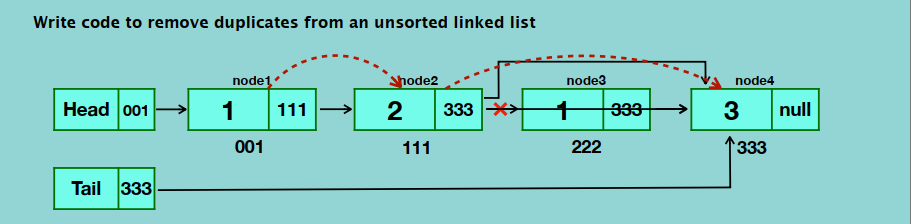

```
current_node = ll.head
while current_node.next:
    if current_node.next.value in visited:
        current_node.next = current_node.next.next
    else:
        visited.add(current_node.next.value)
        current_node = current_node.next
return ll
```

In [2]:
def remove_duplicates(ll):
    # TODO
    if ll.head is None:
        return
    else:
        current_node = ll.head
        visited = set([current_node.value])
        while current_node.next:
            if current_node.next.value in visited:
                current_node.next = current_node.next.next
            else:
                visited.add(current_node.next.value)
                current_node = current_node.next
        return ll

customLL = LinkedList()
customLL.add(1)
customLL.add(2)
customLL.add(2)
customLL.add(3)
customLL.add(4)
customLL.add(4)
customLL.add(4)
customLL.add(5)
print(customLL)
remove_duplicates(customLL)
print(customLL)

1 -> 2 -> 2 -> 3 -> 4 -> 4 -> 4 -> 5
1 -> 2 -> 3 -> 4 -> 5


# Return Nth to Last

**Implement an algorithm to find the nth last element of a singly linked list.**

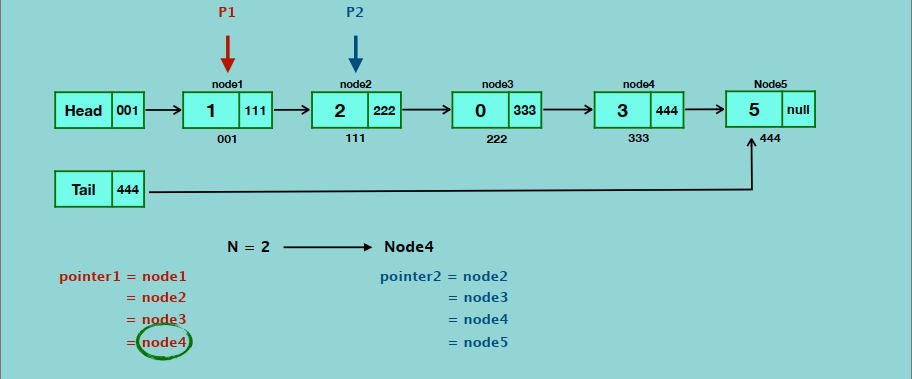

In [3]:
def nthToLast(ll, n):
    pointer1 = ll.head
    pointer2 = ll.head

    # setting pointer 2 at nth node/distance
    for i in range(n):
        if pointer2 is None:
            return None
        pointer2 = pointer2.next

    while pointer2:
        pointer1 = pointer1.next
        pointer2 = pointer2.next
    return pointer1

customLL = LinkedList()
customLL.generate(10, 0, 99)
print(customLL)
print(nthToLast(customLL, 3))

94 -> 1 -> 41 -> 31 -> 49 -> 23 -> 67 -> 23 -> 70 -> 66
23


# Partition

**Write code to partition a linked list around a value x, such that all nodes less than x come before all nodes greater than or equal to x.**

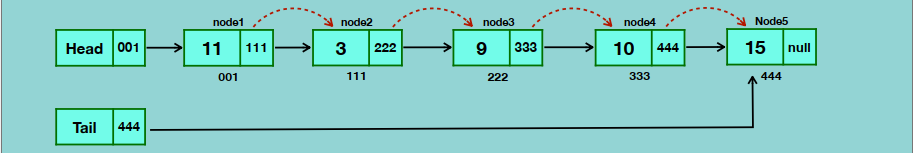

---

**Iteration 1:**

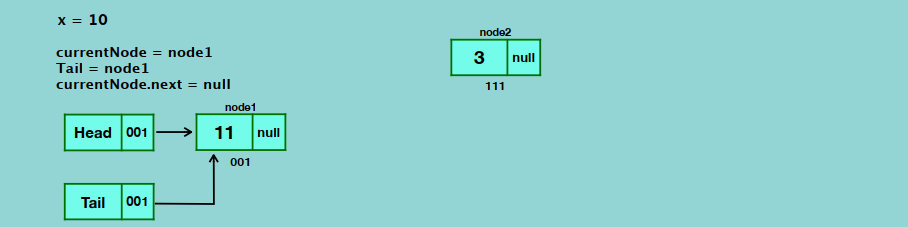

---

**Iteration 2:**

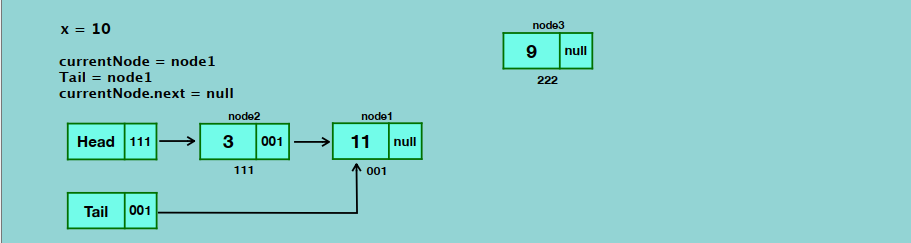

---

**Iteration 3:**

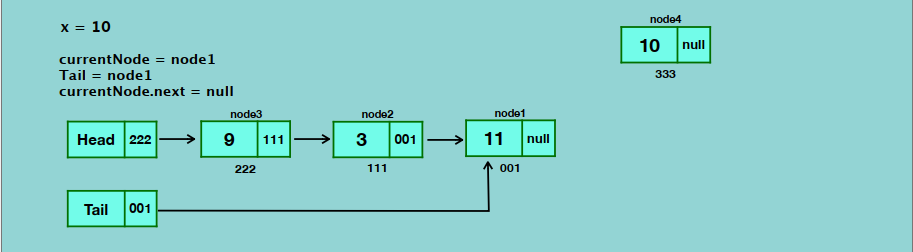

---

**Iteration 4:**

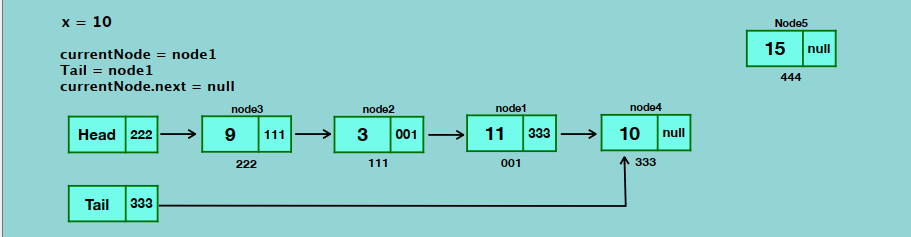

---

**Iteration 5:**

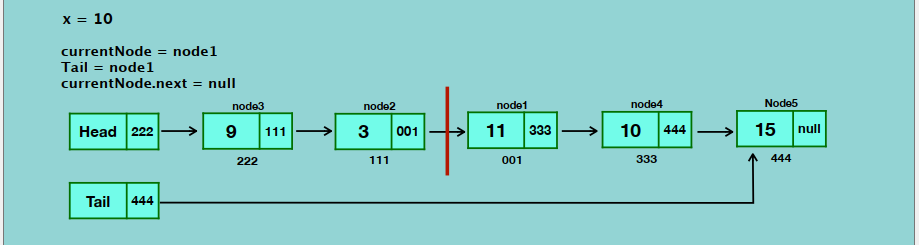

In [7]:
def partition(ll, x):
    curNode = ll.head
    ll.tail = ll.head

    while curNode:
        nextNode = curNode.next
        curNode.next = None
        if curNode.value < x:
            curNode.next = ll.head
            ll.head = curNode
        else:
            ll.tail.next = curNode
            ll.tail = curNode
        curNode = nextNode
    
    if ll.tail.next is not None:
        ll.tail.next = None

customLL = LinkedList()
customLL.generate(10,0,99)
print(customLL)
partition(customLL, 30)
print(customLL)

15 -> 15 -> 86 -> 69 -> 61 -> 3 -> 30 -> 2 -> 15 -> 29
29 -> 15 -> 2 -> 3 -> 15 -> 15 -> 86 -> 69 -> 61 -> 30


# Sum Lists

* You have two numbers represented by a linked list, where each node contains a single digit.
* The digits are stored in reverse order, such that the 1's digit is at the head of the list.
* Write a function that adds the two numbers and returns the sum as a linked list.

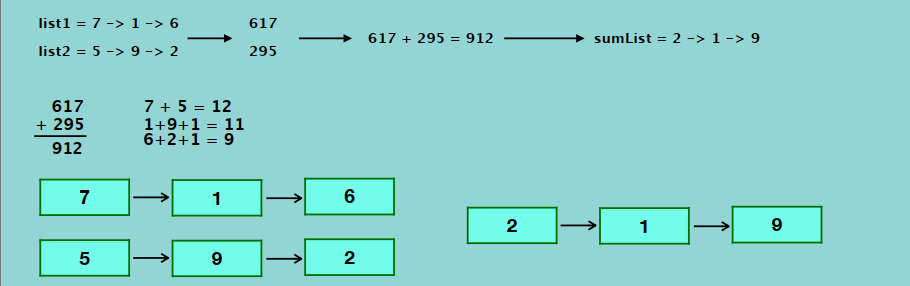

In [8]:
def sumList(llA, llB):
    n1 = llA.head
    n2 = llB.head
    carry = 0
    ll = LinkedList()

    while n1 or n2:
        result = carry
        if n1:
            result += n1.value
            n1 = n1.next
        if n2:
            result += n2.value
            n2 = n2.next
        ll.add(int(result % 10))
        carry = result / 10
    
    return ll

llA = LinkedList()
llA.add(7)
llA.add(1)
llA.add(6)


llB = LinkedList()
llB.add(5)
llB.add(9)
llB.add(2)
print(llA)
print(llB)
print(sumList(llA, llB))


7 -> 1 -> 6
5 -> 9 -> 2
2 -> 1 -> 9


# Intersection

* Given two (singly) linked lists, determine if the two lists intersect.
* Return the intersecting node.
* Note that the intersection is defined based on reference, not value.
* That is, if the kth node of the first linked list is the exact same node (by reference) as the jth node of the second linked list, then they are intersecting.

---

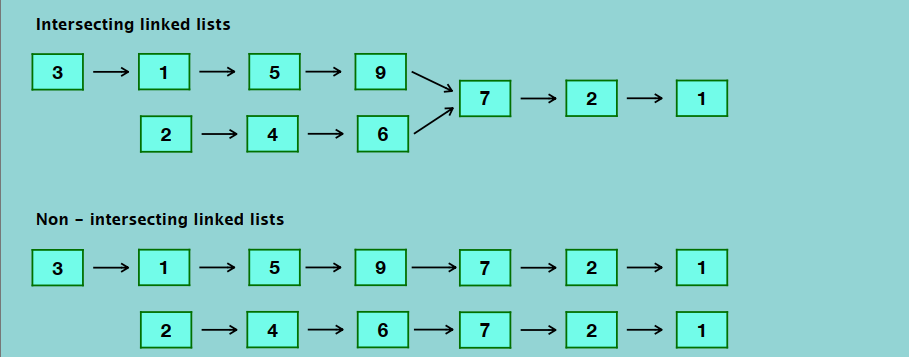

---

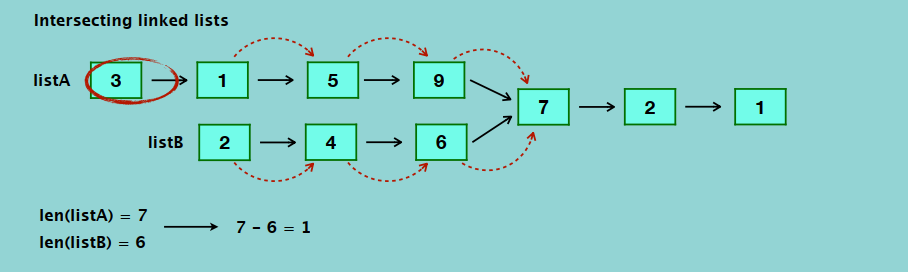

In [9]:
def intersection(llA, llB):
    if llA.tail is not llB.tail:
        return False
    
    lenA = len(llA)
    lenB = len(llB)

    shorter = llA if lenA < lenB else llB
    longer = llB if lenA < lenB else llA

    diff = len(longer) - len(shorter)
    longerNode = longer.head
    shorterNode = shorter.head

    for i in range(diff):
        longerNode = longerNode.next
    
    while shorterNode is not longerNode:
        shorterNode = shorterNode.next
        longerNode = longerNode.next
    
    return longerNode


# Helper addition method
def addSameNode(llA, llB, value):
    tempNode = Node(value)
    llA.tail.next = tempNode
    llA.tail = tempNode
    llB.tail.next = tempNode
    llB.tail = tempNode

llA = LinkedList()
llA.generate(3,0, 10)

llB = LinkedList()
llB.generate(4,0, 10)

addSameNode(llA, llB, 11)
addSameNode(llA, llB, 14)

print(llA)
print(llB)

print(intersection(llA, llB))

4 -> 5 -> 1 -> 11 -> 14
9 -> 8 -> 5 -> 6 -> 11 -> 14
11
